<a href="https://colab.research.google.com/github/tashinam/piano_generation/blob/main/ToyDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
from torch.distributions.categorical import Categorical
import torch
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

Note Pairs

In [ ]:
# pairs = np.zeros((88*88,2))

In [ ]:
# for i in range(88):
#   for j in range(88):
#     pairs[i*88+j]=np.array([i,j])

In [ ]:
# conditions = np.zeros((88*88,1))

In [ ]:
# for e,(i,j) in enumerate(pairs):
#   if i>j:
#     conditions[e]=0
#   if i==j:
#     conditions[e]=1
#   if i<j:
#     conditions[e]=2

Transition Matrix

In [ ]:
# octave = np.array([[.30,.20,.05,.10,.10,.05,.05,.15],
#                    [.15,.30,.15,.10,.10,.10,.05,.05],
#                    [.10,.15,.30,.15,.05,.05,.15,.05],
#                    [.10,.05,.15,.30,.15,.05,.05,.15],
#                    [.15,.10,.05,.15,.30,.15,.05,.05],
#                    [.10,.15,.05,.05,.15,.30,.15,.05],
#                    [.10,.05,.15,.05,.05,.15,.30,.15],
#                    [.10,.05,.05,.15,.10,.05,.20,.30]])
# print(np.sum(octave,1), np.sum(octave,0))

[1. 1. 1. 1. 1. 1. 1. 1.] [1.1  1.05 0.95 1.05 1.   0.9  1.   0.95]


In [ ]:
# twoctave = np.array([[6,4,1,2,2,1,1,3],
#                      [3,6,3,2,2,2,1,1],
#                      [2,3,6,3,1,1,3,1],
#                      [2,1,3,6,3,1,1,3],
#                      [3,2,1,3,6,3,1,1],
#                      [2,3,1,1,3,6,3,1],
#                      [2,1,3,1,1,3,6,3],
#                      [2,1,1,3,2,1,4,6]])
# twoctave = twoctave/20
# print(np.sum(twoctave,1), np.sum(twoctave,0))

[1. 1. 1. 1. 1. 1. 1. 1.] [1.1  1.05 0.95 1.05 1.   0.9  1.   0.95]


In [52]:
twoctave = np.array([[8,8,3,5,6,3,2,6,1,1,1,1,1,1,3],
                     [8,8,8,2,4,6,2,2,4,1,1,1,1,1,1],
                     [2,7,8,7,3,4,6,2,2,4,1,1,1,1,1],
                     [3,2,7,8,7,2,3,6,2,2,4,1,1,1,1],
                     [4,3,2,7,8,7,2,2,4,2,2,4,1,1,1],
                     [1,4,2,2,7,8,7,2,3,4,2,2,4,1,1],
                     [2,2,4,2,2,6,8,6,2,3,4,2,2,4,1],
                     [3,2,2,4,2,2,6,8,6,2,2,4,2,2,3],
                     [1,4,2,2,4,3,1,6,8,6,2,3,4,2,2],
                     [1,1,4,2,2,4,3,2,6,8,6,2,3,4,2],
                     [1,1,1,4,2,2,4,3,2,6,8,7,2,3,4],
                     [1,1,1,1,4,2,2,4,3,2,8,8,7,2,4],
                     [1,1,1,1,1,4,2,2,4,4,2,8,8,8,3],
                     [1,1,1,1,1,1,4,2,2,5,4,3,8,8,8],
                     [3,1,1,1,1,1,1,5,3,3,6,5,3,8,8]])
twoctave = twoctave/50
print(np.sum(twoctave,1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [99]:
seq_len = 16
num_seqs = 5000
seqs = np.zeros((num_seqs,seq_len),dtype='int64')
octave_sampler = Categorical(probs=torch.from_numpy(twoctave)) # generates different transition probabilities (axis 1) based on the previous note (axis 0).
for s in range(num_seqs): # for each sequence
  for pos in range(seq_len): # for each note in the sequence
    if pos == 0: # start all sequences as if C was previous note
      seqs[s,pos]=octave_sampler.sample()[0] 
    else: # choose sample from the distribution of the last note
      seqs[s,pos]=octave_sampler.sample()[seqs[s,pos-1]] 
print(seqs)

[[ 0  7  0 ...  1  9  9]
 [ 8  1  2 ...  5  4  9]
 [ 6  5  5 ... 14  8  1]
 ...
 [ 0  1  1 ...  2  3  8]
 [13 13 13 ...  9  6  3]
 [14 10  9 ...  1  8  2]]


In [ ]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)*np.mean(xs)) - np.mean(xs*xs)))
    
    b = np.mean(ys) - m*np.mean(xs)
    
    return m, b

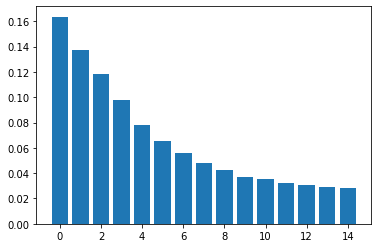

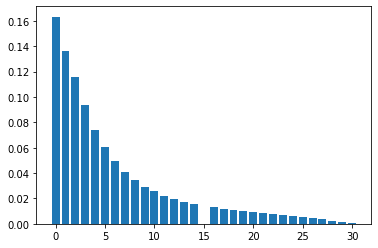

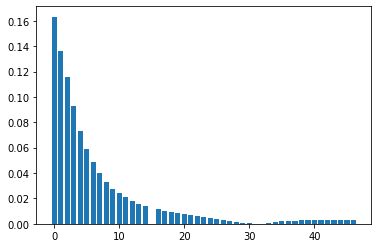

In [100]:
for i in range(1,4):
  rpt = i
  tot_var = np.zeros((1,(seq_len*rpt)-1))
  for i in range(num_seqs):
    y = seqs[i]
    y_longer = [x for x in y for a in range(rpt)]
    xs = range(len(y_longer))
    ys = y_longer
    N = len(y_longer)
    cs = dct(ys, norm='ortho')
    tot_var+=cs[1:]**2
  # print(tot_var/np.sum(tot_var))
  plt.bar(list(range(len(tot_var[0]))),tot_var[0]/np.sum(tot_var))
  plt.show()

[17.04540445  4.01279145 -5.73354117]


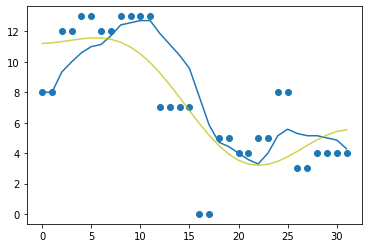

[13.0379848  -5.62691825  0.81465327]


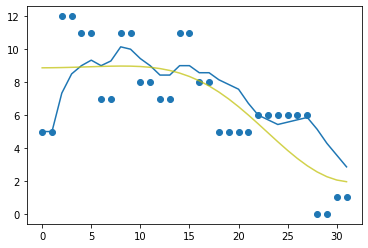

[-4.28824578  5.51565888 -0.19894425]


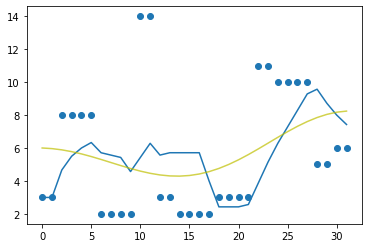

[ -9.32521753  -3.2117014  -10.68419568]


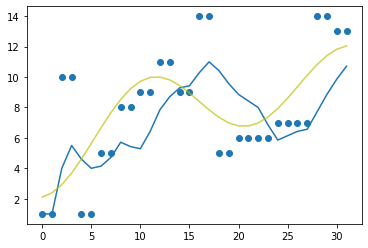

[ 4.56559181 12.0263528   1.036959  ]


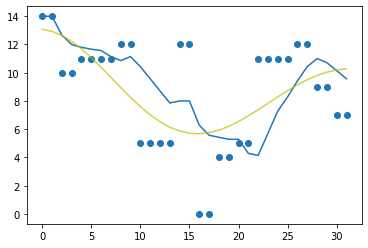

In [50]:
for i in range(num_seqs):
  y = seqs[i]
  y_longer = [x for x in y for a in range(2)]
  xs = range(len(y_longer))
  ys = y_longer
  N = len(y_longer)
  cs = dct(ys, norm='ortho')

  low = 0
  ma = []
  k = 5
  start = 0
  for i in range(len(ys)):
    ma.append(np.array(ys[low:i+1]).mean())
    if i>=k:
      low = i-k
  plt.plot(xs,ma)

  print(cs[1:4])
  plt.scatter(xs[:],ys[:])
  za = idct(cs[:], n=N, norm='ortho')
  plt.plot(xs, za, alpha=.7, lw=1.5, c='y')
  plt.show()


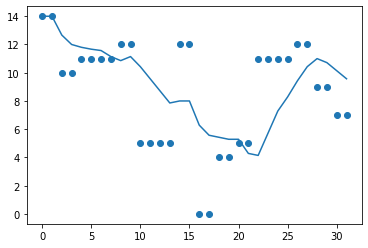

In [39]:

plt.scatter(xs,ys)

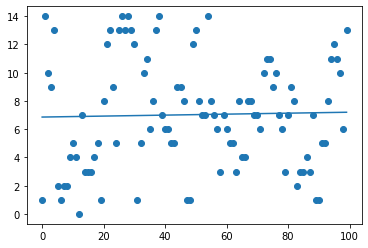

In [ ]:
ys = seqs[4]
plt.scatter(xs,seqs[4])
m, b = best_fit_slope_and_intercept(xs,seqs[4])
line = [(m*x)+b for x in xs]
plt.plot(xs,line)

In [ ]:
def alpha(k, N):
    if k == 0:
        return 1 / np.sqrt(N)
    else:
        return np.sqrt(2/N)
    
def cosine(n, k, N):
    return alpha(k, N) * np.cos(np.pi * (2*n + 1) * k / (2*N))

In [ ]:
for s in range(seqs.shape[0]):
  for i,x in enumerate(seqs[s]):
      seqs[s][i]=note2scale(x)

In [ ]:
xs = np.array(range(16))
ys = seqs[0]
# ms = np.zeros((num_seqs,1))
ms= []
m, b = best_fit_slope_and_intercept(xs,ys)
line = [(m*x)+b for x in xs]
for seq in seqs:
  m, _ = best_fit_slope_and_intercept(xs,seq)
  ms.append(m)
# plt.scatter(xs,ys)
# plt.plot(xs,line)

In [ ]:
a = [-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8]
len(a)

9

In [ ]:
ms = np.array(ms)
n = np.zeros(10)
for m in ms:
  if m<a[0]:
    n[0]+=1
  for x in range(1,len(a)-1):
    if a[x-1]<m<a[x]:
      n[1]+=1
  if m>a[8]:
    n[2]+=1
print(n)

[    0. 49998.     0.     0.     0.     0.     0.     0.     0.     0.]


In [ ]:
m_classes

In [ ]:
def note2scale(x):
  n2s = {'0':60,'1':62,'2':64,'3':65,'4':67,'5':69,'6':71,'7':72,'8':74,'9':76,'10':77,'11':79,'12':81,'13':83,'14':84}
  return n2s.get(str(int(x)),x)

In [ ]:
for s in range(seqs.shape[0]):
  for i,x in enumerate(seqs[s]):
      seqs[s][i]=note2scale(x)

In [ ]:
pairs = seqs

In [ ]:
conditions=np.array(m_classes,ndmin=2).T

In [ ]:
conditions

array([[0],
       [2],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
# seqs = np.zeros((1000,2),dtype=int)
# for s in range(seqs.shape[0]):
#   seq = octave_sampler.sample()
#   seq = seq[:2]
#   for i,x in enumerate(seq):
#     if x==0:
#       seqs[s][i]=60
#     if x==1:
#       seqs[s][i]=62
#     if x==2:
#       seqs[s][i]=64
#     if x==3:
#       seqs[s][i]=65
#     if x==4:
#       seqs[s][i]=67
#     if x==5:
#       seqs[s][i]=69
#     if x==6:
#       seqs[s][i]=71
#     if x==7:
#       seqs[s][i]=72

In [ ]:
# pairs = seqs
# conditions = np.zeros((1000,1))
# for e,(i,j) in enumerate(pairs):
#   if i>j:
#     conditions[e]=0
#   if i==j:
#     conditions[e]=1
#   if i<j:
#     conditions[e]=2

Convert to csv

In [ ]:
pairs = pairs.astype(int)

In [ ]:
conditions = conditions.astype(int)

In [ ]:
pairs = pd.DataFrame(pairs)

In [ ]:
conditions = pd.DataFrame(conditions)

In [ ]:
pairs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0,3,4,13,10,3,2,6,5,0,5,5,4,5,10,4,3,5,6,2,1,0,6,9,9,13,13,14,7,8,5,4,5,5,6,8,1,2,5,13,...,10,7,6,11,10,9,6,2,4,8,9,10,10,13,14,9,4,5,4,12,10,5,8,13,9,12,12,8,8,6,14,12,13,14,5,11,4,8,7,0
1,1,2,6,13,13,13,13,4,8,13,10,11,1,13,14,10,7,11,11,12,13,7,11,6,2,0,0,0,0,0,0,10,6,1,8,12,12,5,6,10,...,9,14,8,13,6,5,6,7,0,0,7,2,6,5,2,2,5,8,8,8,1,2,9,9,8,4,2,6,0,2,10,12,14,9,3,7,2,1,5,3
2,7,3,11,11,7,6,0,6,6,5,4,4,11,12,10,10,9,8,14,14,10,10,9,9,10,14,14,7,6,2,6,7,4,5,1,2,1,2,8,7,...,4,6,5,2,1,0,7,13,6,10,10,0,13,14,6,10,13,9,8,12,9,3,10,7,4,5,4,5,7,4,3,0,7,4,5,6,7,8,7,5
3,0,0,14,14,14,13,3,4,5,12,10,11,12,6,6,5,5,6,7,13,12,13,10,11,10,10,9,7,7,6,14,6,7,7,7,14,14,10,13,1,...,5,6,5,1,4,3,4,10,12,13,11,14,9,2,6,13,6,2,12,5,9,14,7,0,1,6,5,5,6,7,7,7,11,6,6,11,8,11,13,14
4,1,14,10,9,13,2,1,2,2,4,5,4,0,7,3,3,3,4,5,1,8,12,13,9,5,13,14,13,14,13,12,1,5,10,11,6,8,13,14,7,...,6,5,5,3,8,4,4,8,8,7,7,6,10,11,11,9,10,7,6,3,7,9,8,2,3,3,4,3,7,1,1,5,5,8,11,12,11,10,6,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,8,4,10,13,2,2,6,9,9,10,0,2,2,6,2,4,2,4,5,8,9,9,13,14,12,12,6,4,7,3,2,5,0,13,4,2,5,4,0,3,...,4,11,13,13,12,12,12,12,12,11,12,10,6,10,6,5,4,11,12,9,13,10,11,0,5,4,10,3,1,13,12,8,8,0,5,7,9,9,8,8
49996,4,4,5,5,3,6,6,2,2,6,10,5,5,8,7,13,10,5,0,14,7,7,3,0,14,7,3,3,2,2,2,3,9,13,1,5,5,6,5,0,...,7,3,7,12,1,5,3,9,13,7,14,14,9,2,9,13,7,11,14,12,12,8,8,12,6,4,3,4,2,2,7,6,1,4,9,5,6,12,2,3
49997,0,6,6,3,3,3,5,11,8,3,2,4,10,13,8,4,14,8,9,6,9,5,12,11,14,8,10,0,1,1,11,12,7,5,3,1,0,0,5,5,...,9,11,11,8,7,8,1,6,2,0,4,5,4,5,1,14,11,8,8,14,9,5,9,8,8,11,14,0,14,0,4,5,9,12,3,3,12,3,3,4
49998,13,14,13,8,9,9,8,10,0,0,1,4,4,3,12,5,5,4,5,10,2,0,5,8,9,7,0,0,2,6,3,3,6,11,10,10,14,10,5,4,...,2,3,2,7,2,12,13,13,4,7,13,13,12,5,11,5,5,9,6,5,5,4,4,11,10,11,10,5,6,2,11,7,8,1,5,10,11,4,11,5


In [ ]:
conditions

,0
0,0
1,2
2,1
3,0
4,1
...,...
9995,2
9996,2
9997,1
9998,1


In [ ]:
pairs.to_csv('/content/drive/MyDrive/Colab Notebooks/piano_generation/100_seqs.csv',header=False,index=False)
# conditions.to_csv('/content/drive/MyDrive/Colab Notebooks/piano_generation/16_conditions.csv',header=False,index=False)